In [1]:
#Imports
import scipy.io as sp
import heartpy as hp
import matplotlib.pyplot as plt
import pandas as pd
import glob
import ecg_plot as ecg
import numpy as np

## Tests

In [3]:
test = sp.loadmat("../Data/CPSC2018/Training_WFDB/A0001.mat")


In [4]:
print(test['val'].shape)

(12, 7500)


In [5]:
test['val'][0]

array([ 28,  39,  45, ..., 258, 259, 259], dtype=int16)

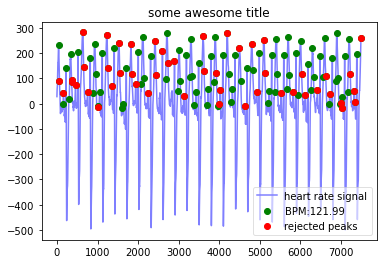

In [6]:
wd, m = hp.process(test['val'][0,:], 100.0)
plot_object = hp.plotter(wd, m, show=False, title='some awesome title')


### Plotting 1 Lead using matplotlib

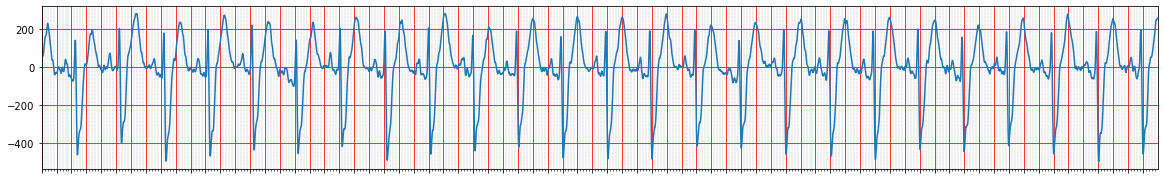

In [6]:
fig, ax = plt.subplots(figsize=(20,3))

ax.plot(list(np.arange(0.0,15.0,0.002)), test['val'][0,:])
# Turn on the minor ticks on
plt.grid(True)
major_ticks = np.arange(0.0,15.0,0.2)
minor_ticks = np.arange(0.0,15.0,0.04)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

# Make the major grid
plt.grid(which='major', linestyle='-', color='red', linewidth='0.8')
# Make the minor grid
plt.grid(which='minor', linestyle=':', color='black', linewidth='0.3')

ax.xaxis.set_ticklabels([])
plt.xlim(0,15)
plt.show()

## Using ECG PLOT library on test data (one instance)
https://pypi.org/project/ecg-plot/

In [46]:
ecgtestdata = pd.DataFrame(test['val'])
ecgtestdata.shape

(12, 7500)

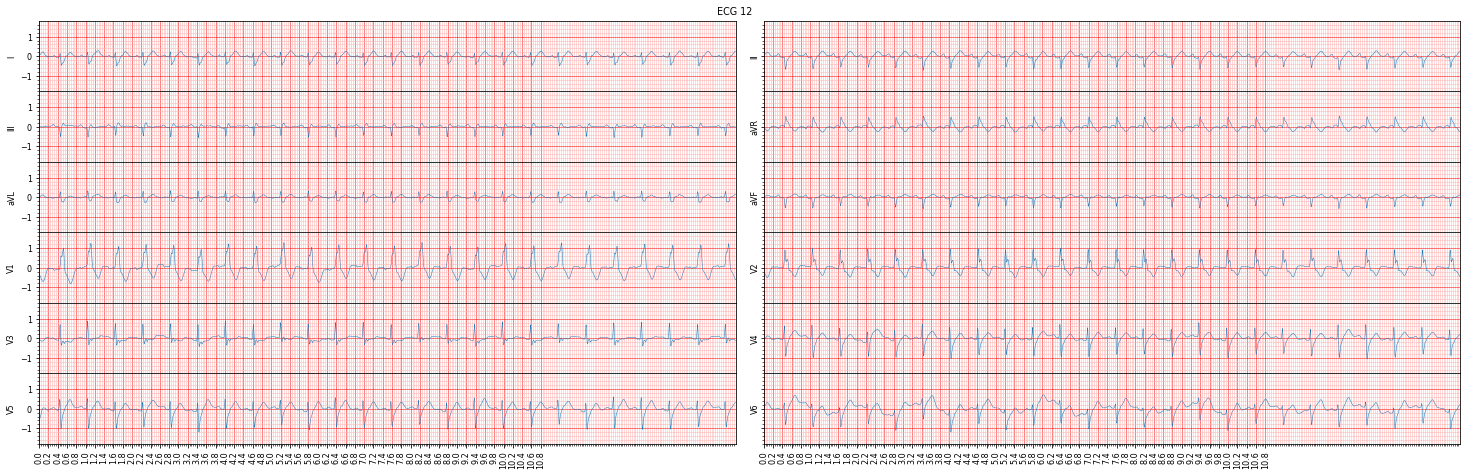

In [49]:
ecg.plot_12(test['val']/1000, sample_rate = 500, title = 'ECG 12', )
ecg.ecg_plot.show()

# Extracting Patient Records from Header Data CPSC2018

In [2]:
patientrecords = pd.DataFrame(columns=['Age','Sex','Dx','Rx','Hx','Sx'])

### Function that extracts all patient information into a dataframe

In [3]:
def file_parse(file_locs, df, keys):
    file_no = -1
    for path in file_locs:
        with open(path, 'r') as file_object:
            file_no += 1
            temp_arr = []
            for line in file_object:
                    for key in keys:
                        if key in line:
                            temp_arr.append(line.split(key,1)[1][:-1])

            df.loc[file_no] = [temp_arr[0]] + [temp_arr[1]] + [temp_arr[2]] + [temp_arr[3]] + [temp_arr[4]] + [temp_arr[5]]
    
    return df

### Retrieve list of all Header Files

In [4]:
all_files = glob.glob("../Data/CPSC2018/Training_WFDB/*.hea")

### Call file parser function

In [5]:
df1 = file_parse(all_files, patientrecords, ['Age: ','Sex: ','Dx: ','Rx: ','Hx: ','Sx: '])
print(df1)

     Age     Sex         Dx       Rx       Hx       Sx
0     74    Male   59118001  Unknown  Unknown  Unknown
1     49  Female  426783006  Unknown  Unknown  Unknown
2     81  Female  164889003  Unknown  Unknown  Unknown
3     45    Male  164889003  Unknown  Unknown  Unknown
4     53    Male  164884008  Unknown  Unknown  Unknown
...   ..     ...        ...      ...      ...      ...
6872  80    Male  270492004  Unknown  Unknown  Unknown
6873  62  Female  429622005  Unknown  Unknown  Unknown
6874  78    Male  164909002  Unknown  Unknown  Unknown
6875  -1  Female  164889003  Unknown  Unknown  Unknown
6876  71  Female  164884008  Unknown  Unknown  Unknown

[6877 rows x 6 columns]


### Import all CT Codes for Dx column

In [6]:
ct_codes = pd.read_csv("../Data/Dx_map.csv")

In [7]:
replace_df = ct_codes.iloc[:, 1:]


### Replace numerical categories with CT codes (for easier viewing)

In [23]:
# Replace numerical with abbreviation CT Codes
for i in range(df1.shape[0]):
    for j in range(0, len(list(replace_df.iloc[:,0]))):
        if str(replace_df.iloc[j,0]) in str(df1['Dx'].iloc[i]):
            df1['Dx'].iloc[i] = df1['Dx'].iloc[i].replace(str(replace_df.iloc[j,0]), str(replace_df.iloc[j,1]))
    


In [29]:
testdf = df1[df1["Dx"].str.contains(",")].reset_index(drop=True)
list(testdf["Dx"][0].split(","))

['AF', 'RBBB']

In [7]:
def file_parse(file_locs, df, keys):
    file_no = -1
    for path in file_locs:
        with open(path, 'r') as file_object:
            file_no += 1
            temp_arr = []
            for line in file_object:
                    for key in keys:
                        if key in line:
                            temp_arr.append(line.split(key,1)[1][:-1])

            df.loc[file_no] = [temp_arr[0]] + [temp_arr[1]] + [temp_arr[2]]
    
    return df

def extract_hea_data(inputdir, outputdir, fs):
    patientrecords = pd.DataFrame(columns=['Age','Sex','Dx', 'Fs'])
    
    all_files = glob.glob(inputdir)
    df1 = file_parse(all_files, patientrecords, ['Age: ','Sex: ','Dx: '])
    df["Fs"].values[:] = fs 
    ct_codes = pd.read_csv("../Data/Dx_map.csv")
    replace_df = ct_codes.iloc[:, 1:]
    
    # Replace numerical with abbreviation CT Codes
    for i in range(df1.shape[0]):
        for j in range(0, len(list(replace_df.iloc[:,0]))):
            if str(replace_df.iloc[j,0]) in str(df1['Dx'].iloc[i]):
                df1['Dx'].iloc[i] = df1['Dx'].iloc[i].replace(str(replace_df.iloc[j,0]), str(replace_df.iloc[j,1]))
    print(df1.shape)
    df1.to_csv(outputdir)
    

                
# CPS2018             
extract_hea_data(inputdir="../Data/CPSC2018/Training_WFDB/*.hea", 
                 outputdir="../Data/CPSC2018/cpsc2018_patient_information.csv", 500)     

# CPS2018 UNUSED
extract_hea_data(inputdir="../Data/CPSC2018_UNUSED/Training_2/*.hea", 
                 outputdir="../Data/CPSC2018_UNUSED/cpsc2018unused_patient_information.csv", 500)     

# Georgia
extract_hea_data(inputdir="../Data/GEORGIA/WFDB/*.hea", 
                 outputdir="../Data/GEORGIA/georgia_patient_information.csv", 500)

# PTB
extract_hea_data(inputdir="../Data/PTB/WFDB/*.hea", 
                 outputdir="../Data/PTB/ptb_patient_information.csv", 1000)

# PTBXL
extract_hea_data(inputdir="../Data/PTBXL/WFDB/*.hea", 
                 outputdir="../Data/PTBXL/ptbxl_patient_information.csv", 500)

# St. Petersburg
extract_hea_data(inputdir="../Data/STPETERSBURG/WFDB/*.hea", 
                 outputdir="../Data/STPETERSBURG/stpetersburg_patient_information.csv", 257)

(6877, 3)
(3453, 3)
(10344, 3)
(516, 3)
(21837, 3)
(74, 3)


### Call cell to export header data to csv

In [2]:
#df1.to_csv("../Data/CPSC2018/cpsc2018_patient_information.csv")

## Distribution of Classes Visualised

In [19]:
distribution = df1["Dx"].value_counts().reset_index()
print(distribution.nunique())
print(distribution)

index    36
Dx       24
dtype: int64
           index    Dx
0           RBBB  1533
1             AF   976
2            SNR   918
3            STD   784
4           IAVB   686
5            VEB   607
6            PAC   533
7            STE   185
8           LBBB   179
9        AF,RBBB   172
10      RBBB,PAC    52
11      RBBB,VEB    51
12        AF,STD    30
13       AF,LBBB    26
14      RBBB,STD    20
15       VEB,STD    18
16      RBBB,STE    16
17      LBBB,PAC    10
18     IAVB,RBBB    10
19        AF,VEB     8
20     IAVB,LBBB     8
21       PAC,STD     6
22      IAVB,STD     6
23      LBBB,VEB     6
24      IAVB,VEB     5
25      IAVB,STE     4
26        AF,PAC     4
27      LBBB,STE     4
28      IAVB,PAC     3
29  RBBB,PAC,STE     3
30   AF,LBBB,STD     3
31       PAC,VEB     3
32       STD,STE     2
33       VEB,STE     2
34       PAC,STE     2
35        AF,STE     2


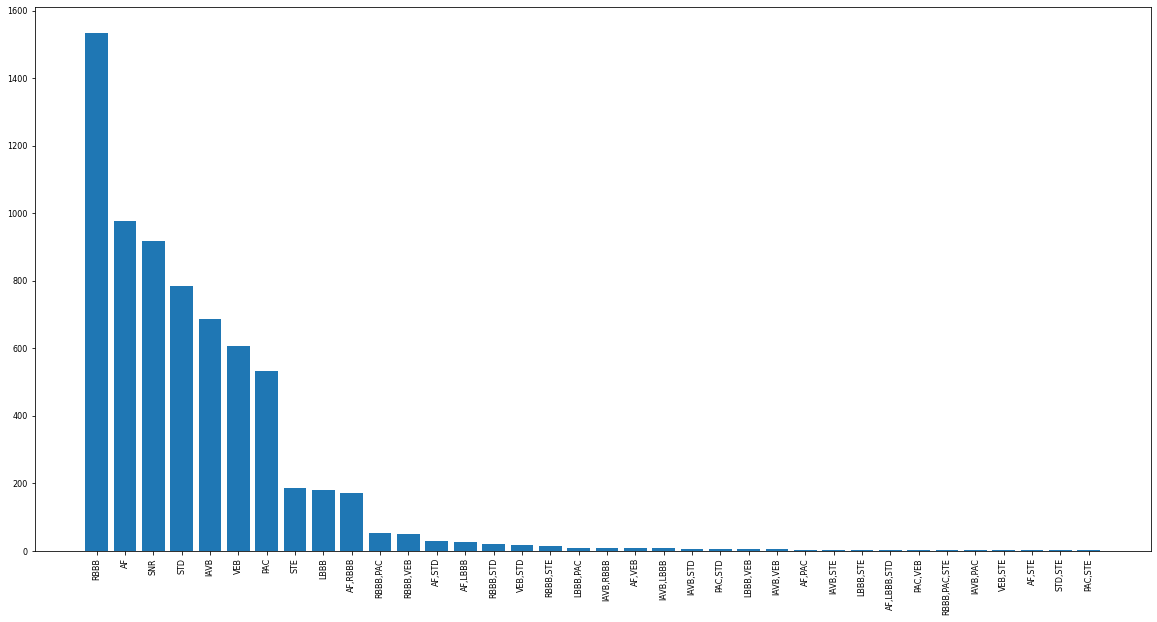

In [59]:
plt.figure(figsize=(20,10))
plt.bar(distribution.iloc[:,0], distribution.iloc[:,1])
plt.xticks(rotation='vertical')
plt.show()

## Male vs Female distribution

In [60]:
gender = df1['Sex'].value_counts().reset_index()

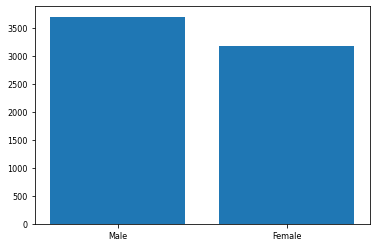

Male      3699
Female    3178
Name: Sex, dtype: int64


In [63]:
plt.figure()
plt.bar(gender.iloc[:,0], gender.iloc[:,1])
plt.show()
print(df1['Sex'].value_counts())